<a href="https://colab.research.google.com/github/Yash1289/play_store_data_Eda/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/Play Store Data.csv"
play_store_df = pd.read_csv(file_path)

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
arbitary_ratings = play_store_df[play_store_df["Rating"] > 5]
arbitary_ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
index = play_store_df["Rating"].argmax()
play_store_df.iloc[index , 1: ] = play_store_df.iloc[index , 1: ].shift()
play_store_df.loc[index ,"Rating"] = float(play_store_df.loc[index ,"Rating"])
play_store_df.loc[index ,"Reviews"] = float(play_store_df.loc[index ,"Reviews"])

In [ ]:
play_store_df["Rating"] = np.where(play_store_df["Rating"].isna(), play_store_df["Rating"].mean() , play_store_df["Rating"]  )

In [ ]:
play_store_df.drop_duplicates(subset ="App" , keep="first",inplace=True)
play_store_df["Reviews"] = play_store_df["Reviews"].astype(int)

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             9660 non-null   object
 1   Category        9659 non-null   object
 2   Rating          9660 non-null   object
 3   Reviews         9660 non-null   int64 
 4   Size            9660 non-null   object
 5   Installs        9660 non-null   object
 6   Type            9659 non-null   object
 7   Price           9660 non-null   object
 8   Content Rating  9660 non-null   object
 9   Genres          9659 non-null   object
 10  Last Updated    9660 non-null   object
 11  Current Ver     9652 non-null   object
 12  Android Ver     9658 non-null   object
dtypes: int64(1), object(12)
memory usage: 1.0+ MB


In [ ]:
play_store_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
def stringToInt(installs):
  if installs == "0":
    return int(installs)
  else :
    return int(installs[:-1].replace(",",""))

In [ ]:
play_store_df["Installs"] = play_store_df["Installs"].apply(stringToInt)

In [ ]:
app_with_1m_downloads = play_store_df[play_store_df["Installs"] >= 1000000]
highest_rated_apps = app_with_1m_downloads[app_with_1m_downloads["Rating"] == app_with_1m_downloads["Rating"].max()]
highest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up
1258,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,5000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.4,4.2 and up
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10M,1000000,Free,0,Everyone,Health & Fitness,"July 30, 2018",Varies with device,Varies with device
7000,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723,14M,1000000,Free,0,Everyone,Entertainment,"June 4, 2018",3.3,4.0.3 and up
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device


In [ ]:
lowest_rated_apps = app_with_1m_downloads[app_with_1m_downloads["Rating"] == app_with_1m_downloads["Rating"].min()]
lowest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5048,AppFinder by AppTap,TOOLS,2,2221,4.9M,5000000,Free,0,Everyone,Tools,"October 3, 2017",1.8.2.7,5.0 and up


In [ ]:
highest_installed_apps = app_with_1m_downloads.sort_values(by =["Installs", "Reviews"] , ascending=[False, False] , ignore_index = True)[:10]
highest_installed_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
6,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
7,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
8,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
9,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


In [ ]:
most_reviewed_app = play_store_df[play_store_df["Reviews"] == play_store_df["Reviews"].max()]
most_reviewed_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


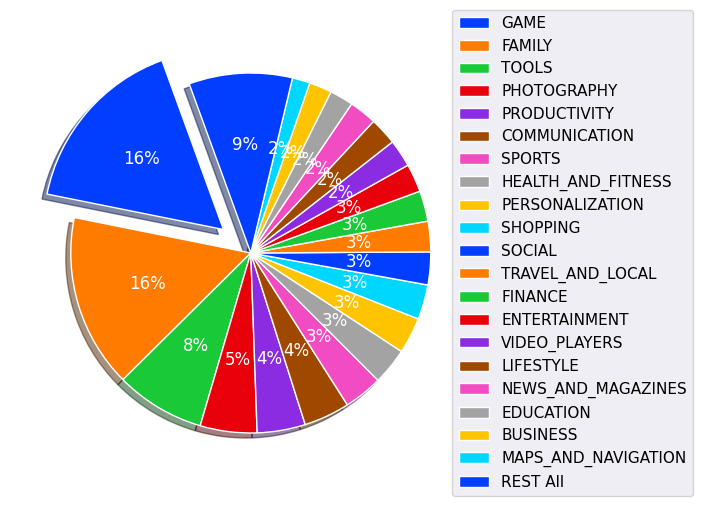

In [ ]:
category_wise_apps = app_with_1m_downloads["Category"].value_counts()
category_wise_apps_list = category_wise_apps.index.tolist()
category_wise_apps_count = list(category_wise_apps.values)

# for index, x in enumerate(category_wise_apps_count):
#   if index <=  :
#     slicingIndex = index
#     break
slicingIndex = 20

category_wise_apps_list = category_wise_apps_list[:slicingIndex]
category_wise_apps_count_new = category_wise_apps_count[:slicingIndex]
sumofRest = sum(category_wise_apps_count[slicingIndex:])
category_wise_apps_list.append("REST All")
category_wise_apps_count_new.append(sumofRest)

totalCategories = len(category_wise_apps_count_new)

fig_1 = plt.figure(figsize=(8,5),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(category_wise_apps_count_new, explode=explode, labels = category_wise_apps_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

plt.legend(wedges, category_wise_apps_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

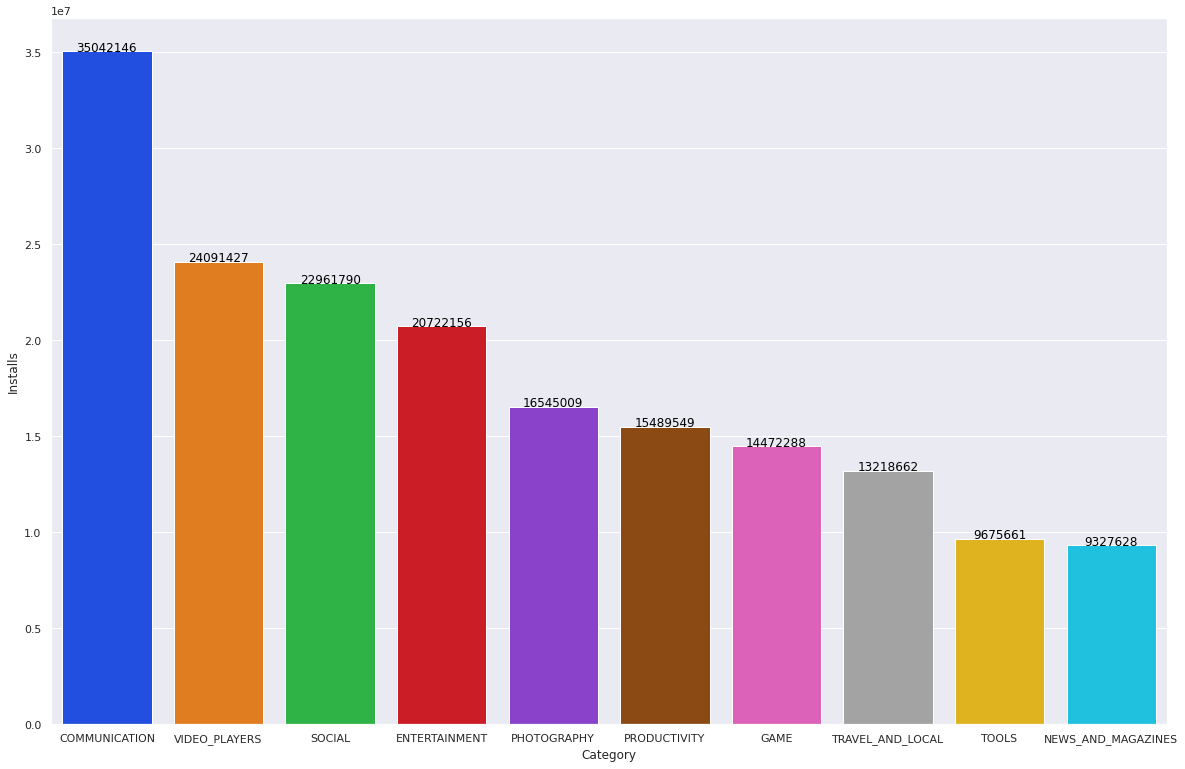

In [ ]:
installs_groupby = play_store_df.groupby("Category").agg({ "Installs" : "mean"}).reset_index().sort_values(by = "Installs" , ascending=False ,ignore_index=True)[:10]
installs_groupby["Installs"] = installs_groupby["Installs"].astype("int64")
installs_groupby

plt.rcParams['figure.figsize'] = 20,13
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Category',y='Installs',data = installs_groupby, palette = 'bright',estimator = np.mean)
for index, row in installs_groupby.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")

In [ ]:
play_store_df["Rating"] = play_store_df["Rating"].astype("float64")
ratings_groupby = play_store_df.groupby("Category").agg({"Rating" : "mean"}).reset_index()
ratings_groupby


,Category,Rating
0,ART_AND_DESIGN,4.349602
1,AUTO_AND_VEHICLES,4.190567
2,BEAUTY,4.260503
3,BOOKS_AND_REFERENCE,4.308334
4,BUSINESS,4.133256
5,COMICS,4.181840
6,COMMUNICATION,4.134601
7,DATING,4.018047
8,EDUCATION,4.362954
9,ENTERTAINMENT,4.135294


In [ ]:
highest_across_category = play_store_df.groupby(["Category"]).agg({ "Installs" : "max" , "App" : "first"}).reset_index()
highest_across_category

,Category,Installs,App
0,ART_AND_DESIGN,50000000,Photo Editor & Candy Camera & Grid & ScrapBook
1,AUTO_AND_VEHICLES,10000000,Monster Truck Stunt 3D 2019
2,BEAUTY,10000000,Hush - Beauty for Everyone
3,BOOKS_AND_REFERENCE,1000000000,Wattpad 📖 Free Books
4,BUSINESS,100000000,Visual Voicemail by MetroPCS
5,COMICS,10000000,LINE WEBTOON - Free Comics
6,COMMUNICATION,1000000000,Messenger – Text and Video Chat for Free
7,DATING,10000000,"Moco+ - Chat, Meet People"
8,EDUCATION,100000000,Duolingo: Learn Languages Free
9,ENTERTAINMENT,1000000000,Netflix


In [ ]:
highest_rated_across_category = app_with_1m_downloads.groupby("Category").agg({ "Rating": "max" , "App" : "first"})
highest_rated_across_category

,Rating,App
Category,,
ART_AND_DESIGN,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
AUTO_AND_VEHICLES,4.9,Real Tractor Farming
BEAUTY,4.9,"ipsy: Makeup, Beauty, and Tips"
BOOKS_AND_REFERENCE,4.9,Wattpad 📖 Free Books
BUSINESS,4.8,Visual Voicemail by MetroPCS
COMICS,4.8,LINE WEBTOON - Free Comics
COMMUNICATION,4.8,Messenger – Text and Video Chat for Free
DATING,4.5,Zoosk Dating App: Meet Singles
EDUCATION,4.9,Duolingo: Learn Languages Free


In [ ]:
highest_installed_across_content = play_store_df.groupby("Content Rating").agg({ "Installs" : "max" , "App" : "first"})
highest_installed_across_content

,Installs,App
Content Rating,,
Adults only 18+,1000000,Manga Master - Best manga & comic reader
Everyone,1000000000,Photo Editor & Candy Camera & Grid & ScrapBook
Everyone 10+,1000000000,Superheroes Wallpapers | 4K Backgrounds
Mature 17+,500000000,"Secrets of beauty, youth and health"
Teen,1000000000,Sketch - Draw & Paint
Unrated,50000,Best CG Photography


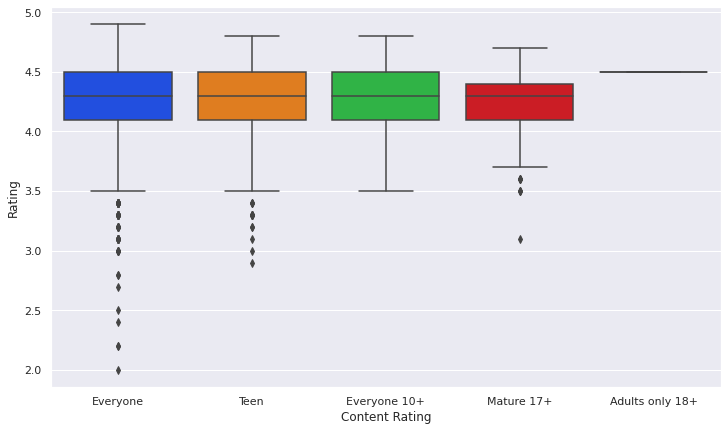

In [ ]:
plt.rcParams['figure.figsize'] = 12,7
ax = sns.boxplot(x="Content Rating" , y = "Rating" , data=app_with_1m_downloads , palette="bright")

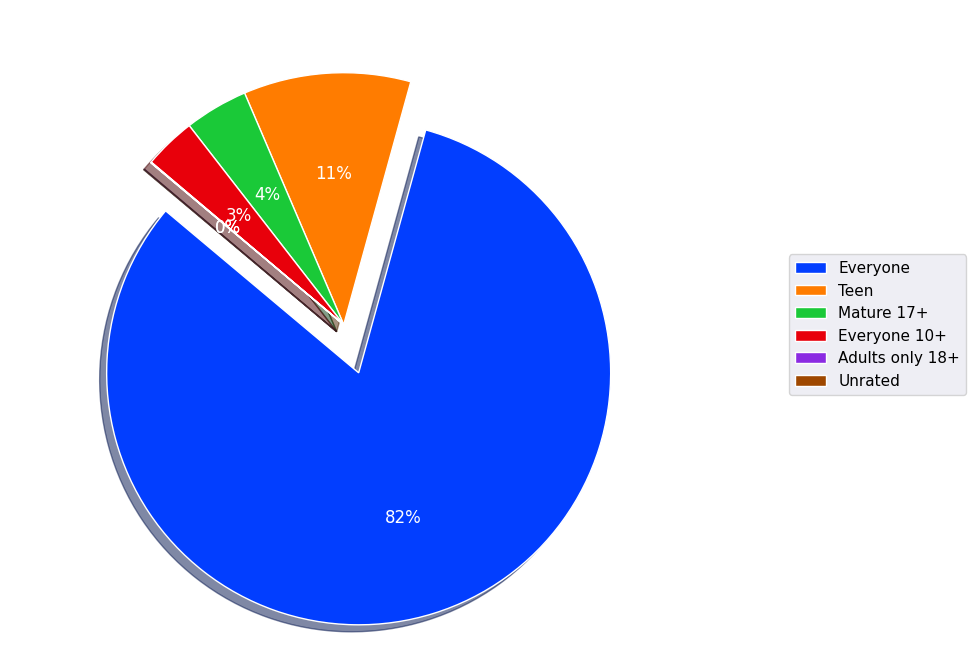

In [ ]:
content_rating_count = play_store_df["Content Rating"].value_counts()
content_rating_list = content_rating_count.index.tolist()
content_rating_apps_count = content_rating_count.values

totalCategories = len(content_rating_list)

fig_1 = plt.figure(figsize=(10,7),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(content_rating_apps_count, explode=explode, labels = content_rating_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=140, 
                                    textprops=dict(color="w"))

plt.legend(wedges, content_rating_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

In [ ]:

{highest_rated_acorss_content = app_with_1m_downloads.groupby("Content Rating").agg({ "Rating" : "max" , "App" : "first" })
highest_rated_acorss_content


,Rating,App
Content Rating,,
Adults only 18+,4.5,DraftKings - Daily Fantasy Sports
Everyone,4.9,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
Everyone 10+,4.8,Police Detector (Speed Camera Radar)
Mature 17+,4.7,Read books online
Teen,4.8,Sketch - Draw & Paint


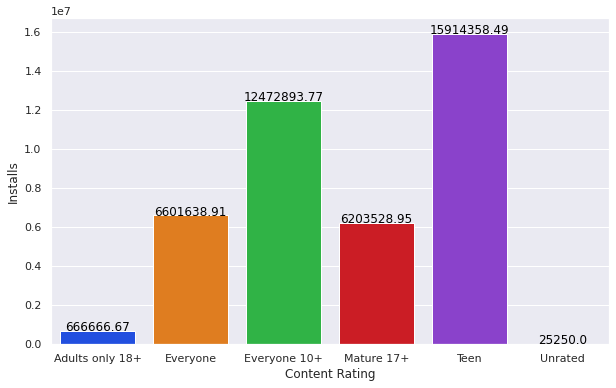

In [ ]:
content_installs_mean = play_store_df.groupby("Content Rating").agg({ "Installs" : "mean"}).reset_index()
content_installs_mean
plt.rcParams['figure.figsize'] = 10,6
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Content Rating',y='Installs',palette = 'bright',data = content_installs_mean ,estimator = np.mean)
for index, row in content_installs_mean.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")

## 2nd DataFrame

In [16]:
file_path2 = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/User Reviews.csv"
app_review_df = pd.read_csv(file_path2)

In [17]:
app_review_df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [18]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [19]:
app_review_df.dropna( inplace=True)

In [20]:
app_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [21]:
app_review_df["count"] = app_review_df.groupby('App')['App'].transform('count')
most_reviews_apps = app_review_df.sort_values(by="count" , ascending=False , ignore_index=True)
most_reviews_apps

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,count
0,Bowmasters,"Should vary videos required watch, least give ...",Positive,0.042857,0.394286,312
1,Bowmasters,Just Awesome bloody fun! Think Mortal Kombat b...,Positive,0.386111,0.822222,312
2,Bowmasters,Ui needs work. Hero select frustrating. Too ma...,Positive,0.050000,0.700000,312
3,Bowmasters,"It uses Target advertising let hit "" thank you...",Neutral,0.000000,0.000000,312
4,Bowmasters,I rate 4 stars ads chests really annoying I'm ...,Negative,-0.182727,0.570909,312
...,...,...,...,...,...,...
37422,Bed Time Fan - White Noise Sleep Sounds,"If app, I'd lug fan everywhere, love it!!",Positive,0.781250,0.600000,1
37423,CBS News,I hoping find feature yesterday news find it.,Neutral,0.000000,0.000000,1
37424,Calculator - unit converter,Its great calculator India India different num...,Positive,0.183333,0.533333,1
37425,DashClock Widget,"Most still functional, Gmail integration appea...",Positive,0.033333,0.419048,1


In [23]:
most_reviewed_app = most_reviews_apps[most_reviews_apps["count"] == most_reviews_apps["count"].max()]
most_reviewed_app

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,count
0,Bowmasters,"Should vary videos required watch, least give ...",Positive,0.042857,0.394286,312
1,Bowmasters,Just Awesome bloody fun! Think Mortal Kombat b...,Positive,0.386111,0.822222,312
2,Bowmasters,Ui needs work. Hero select frustrating. Too ma...,Positive,0.050000,0.700000,312
3,Bowmasters,"It uses Target advertising let hit "" thank you...",Neutral,0.000000,0.000000,312
4,Bowmasters,I rate 4 stars ads chests really annoying I'm ...,Negative,-0.182727,0.570909,312
...,...,...,...,...,...,...
307,Bowmasters,Perfect game.. A Biiittt violent bloody though.,Negative,-0.250000,0.825000,312
308,Bowmasters,Awesome game! Videos make game freeze sometime...,Negative,-0.140000,0.520000,312
309,Bowmasters,"This game amazing creative. Just suggestion, w...",Positive,0.175000,0.700000,312
310,Bowmasters,"Fun game, ads invasive forced. I installed fro...",Negative,-0.133333,0.266667,312


In [27]:
from wordcloud import WordCloud, STOPWORDS

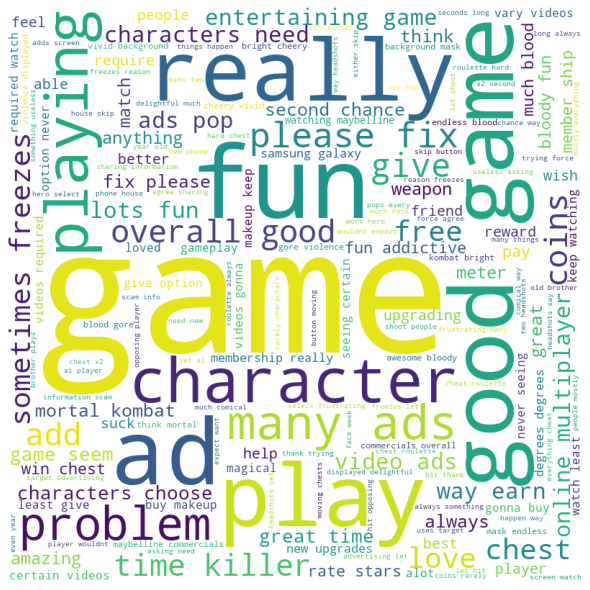

In [28]:
review_words= ""
stopwords = set(STOPWORDS)

for index,row in most_reviewed_app.iterrows():
  review_words += row["Translated_Review"]

review_words = review_words.lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [11]:
app_groupby2 = most_reviews_apps.groupby(["App" , "Sentiment"] ,sort=False).agg({"Translated_Review" : "count"}).reset_index()[:15]
app_groupby2_pivot = app_groupby2.pivot(index="App" , columns="Sentiment" , values="Translated_Review")
app_groupby2_pivot

Sentiment,Negative,Neutral,Positive
App,,,
8 Ball Pool,106,9,104
Angry Birds Classic,147,2,124
Bowmasters,119,24,169
"CBS Sports App - Scores, News, Stats & Watch Live",42,27,123
Helix Jump,58,6,209


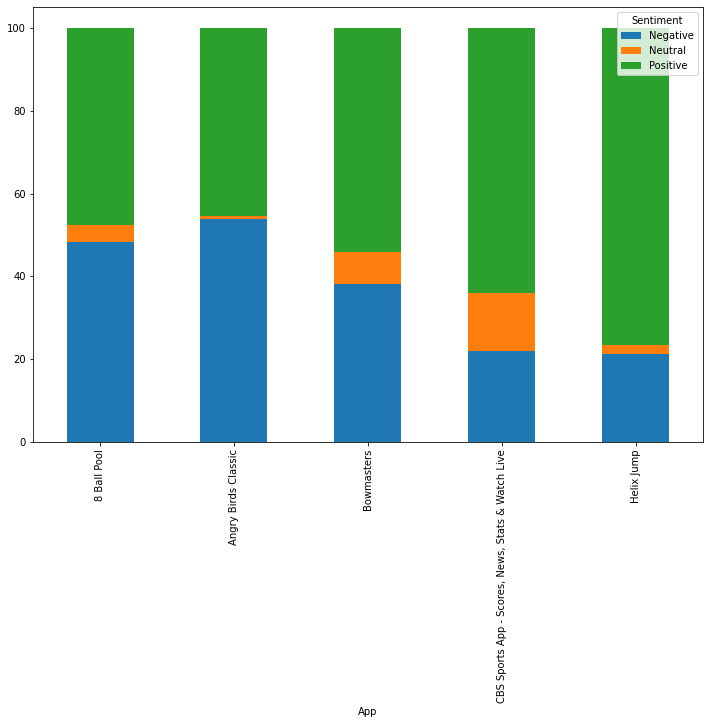

In [13]:
app_groupby2_pivot = app_groupby2_pivot.apply(lambda x: x*100/sum(x), axis=1)
app_groupby2_pivot.plot(kind="bar" , stacked=True , figsize=(12,8))